# Step 1: Reading and Understanding the Data

In [1]:
# loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
bikedata=pd.read_csv(r'D:\har\mldl\upgrad\assignment bike\day.csv')
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikedata.shape

(730, 16)

In [4]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bikedata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikedata[['mnth']].value_counts()

mnth
1       62
3       62
5       62
7       62
8       62
10      62
12      62
4       60
6       60
9       60
11      60
2       56
dtype: int64

In [8]:
# as we know instants are the records and casual and regired are combined, as count and date these varaiable we cannot use  so we can drop these columns
new_bikedata=bikedata.drop(['instant','dteday','casual','registered'],axis=1)

In [9]:
new_bikedata.shape

(730, 12)

In [10]:
#Mapping variables season, month, weathersit, weekday

new_bikedata['season']=new_bikedata.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
new_bikedata['mnth']=new_bikedata.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
new_bikedata['weathersit']=new_bikedata.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
new_bikedata['weekday']=new_bikedata.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
new_bikedata.shape

(730, 12)

# Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable


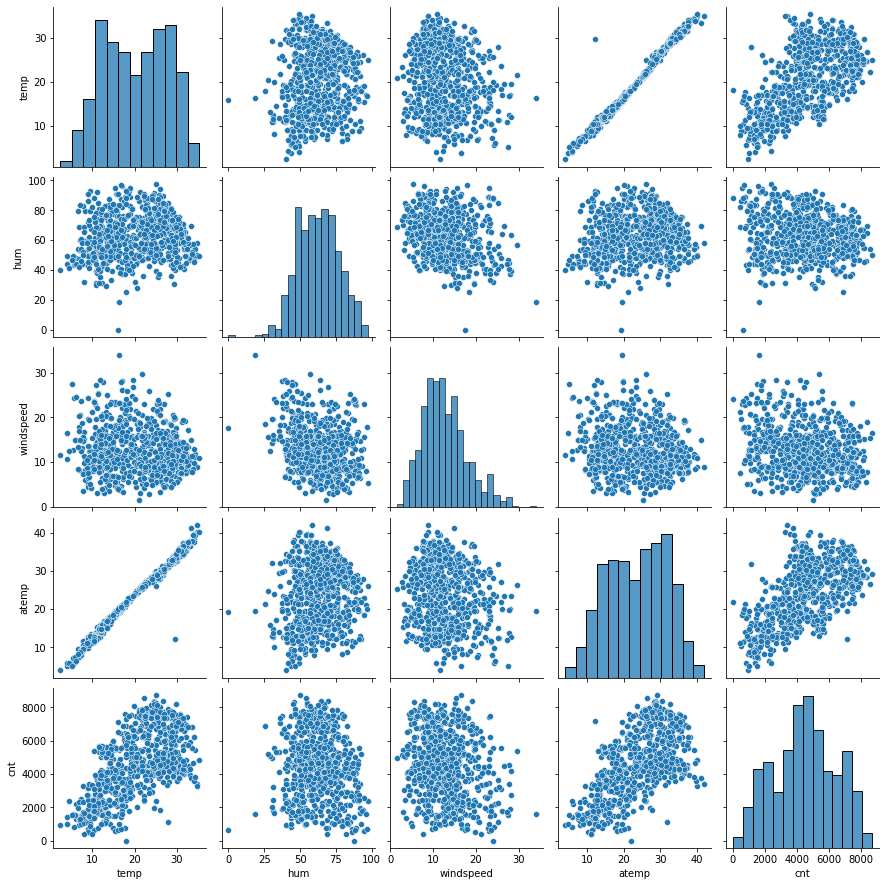

In [12]:
# plotting pair plot
sns.pairplot(new_bikedata, vars=["temp", "hum",'windspeed','atemp','cnt'])
plt.show()

temp and atemp have linear corelation wind and hum are scattered more compared to temp.

#### visualizing categorical variable by using box plot

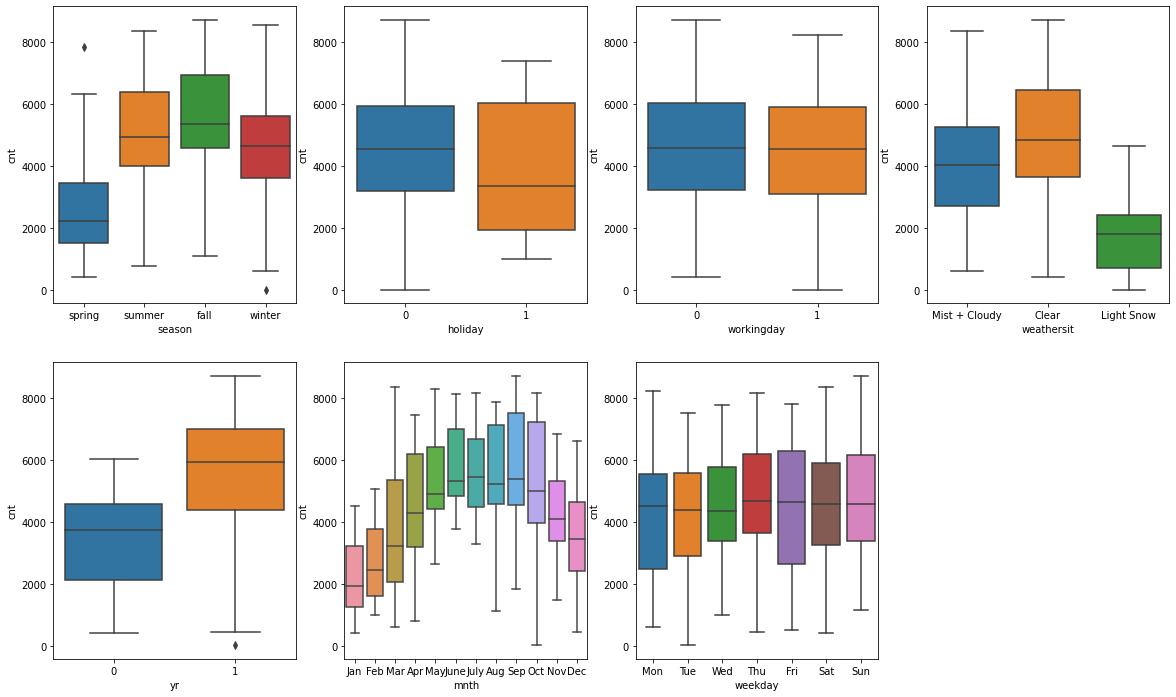

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = new_bikedata)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = new_bikedata)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = new_bikedata)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = new_bikedata)
plt.subplot(2,4,5)
sns.boxplot(x = 'yr', y = 'cnt', data = new_bikedata)
plt.subplot(2,4,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = new_bikedata)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = new_bikedata)

plt.show()

- season:-
    - season-spring count is less compared to 4 season and 75 count lies much  below 25% of remaining season there is less usage of bike in this season.
    - season-summer in this seson the bike is second most usage and there is slight difference between median.
    - season-fall is the most number of rent of bikes happened in this seson.
    - seson-winter is 3 highest for renting the bike.
- yr : -
    - in 2019 bike rented is more more compare to 2018.
- mnth:-
    - september is the mnth for heighest bike rent followed by oct then aug.
- weekday:-
    - sunday is the day where bike rented was followed by monday.
    - friday marginally higer than on thursday but both median of thurday and friday are same.
- holiday:-
    - 0 and 1 which indicate  working day and holiday we can see that on woking day bike rented is more.
- weathersit:-
    - bike rented is more in clear and low on ligh snow.
    
    
    

let now correlate all numerical variable with corelation matrix if two varibale having high corelation of 0.4 we can drop on variable

### Lets understand the variables better

#### 1. mnth

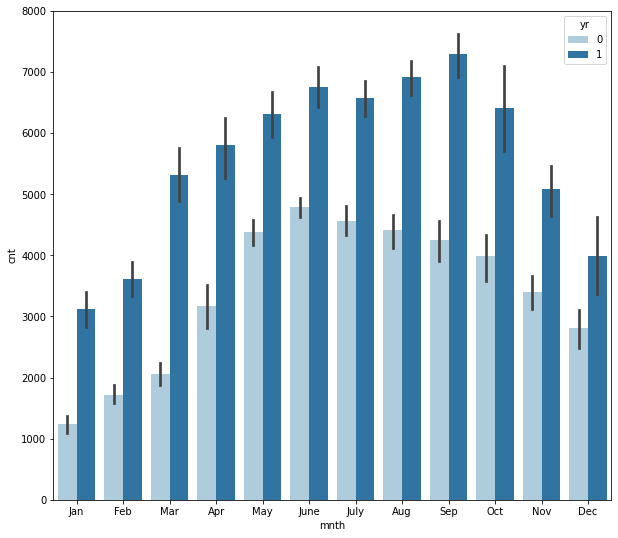

In [14]:
# lets plot using histogram
plt.figure(figsize=[10,9])
sns.barplot(data=new_bikedata,x='mnth',y='cnt',hue='yr',palette='Paired')
plt.show()

#### 2. weekdays

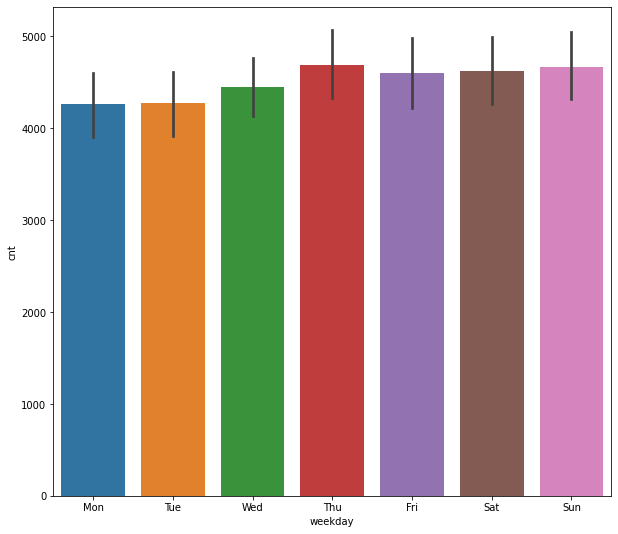

In [15]:
plt.figure(figsize=[10,9])
sns.barplot(data=new_bikedata,x='weekday',y='cnt')
plt.show()

were are not getting much inference all the inference we have got from boxplot so let move and plot heatmap the variable

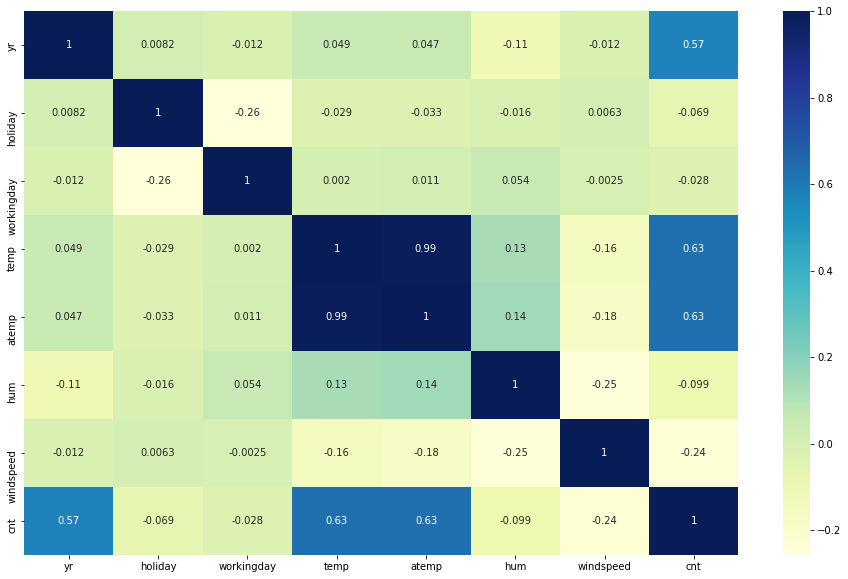

In [16]:
plt.figure(figsize = (16, 10))
sns.heatmap(new_bikedata.corr(), annot = True, cmap="YlGnBu")
plt.show()

- cnt highest corelation found with temp,atemp and yr.
- temp and atemp has corelation of 0.99.

# 3.Data Preparation

In [17]:
# create dummy variables for categorical variable which have more than  2 values.
mnth_dummy=pd.get_dummies(new_bikedata['mnth'],drop_first=True)
season_dummy=pd.get_dummies(new_bikedata['season'],drop_first=True)
weekday_dummy=pd.get_dummies(new_bikedata['weekday'],drop_first=True)
weathersit_dummy=pd.get_dummies(new_bikedata['weathersit'],drop_first=True)
print(season_dummy)

     spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]


In [18]:
# now adding all dummies tomain bikedata set dataframe
new_bikedata=pd.concat([new_bikedata,mnth_dummy,season_dummy,weekday_dummy,weathersit_dummy],axis=1)

In [19]:
new_bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [20]:
new_bikedata.shape

(730, 34)

In [21]:
new_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   yr             730 non-null    int64  
 2   mnth           730 non-null    object 
 3   holiday        730 non-null    int64  
 4   weekday        730 non-null    object 
 5   workingday     730 non-null    int64  
 6   weathersit     730 non-null    object 
 7   temp           730 non-null    float64
 8   atemp          730 non-null    float64
 9   hum            730 non-null    float64
 10  windspeed      730 non-null    float64
 11  cnt            730 non-null    int64  
 12  Aug            730 non-null    uint8  
 13  Dec            730 non-null    uint8  
 14  Feb            730 non-null    uint8  
 15  Jan            730 non-null    uint8  
 16  July           730 non-null    uint8  
 17  June           730 non-null    uint8  
 18  Mar       

In [22]:
# now lets drop the columns which we have created dummy variable
new_bikedata.drop(['mnth','weekday','season','weathersit'],axis=1,inplace=True)



In [23]:
new_bikedata.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
new_bikedata.shape

(730, 30)

# 4.splitting the datase using sklearn

In [25]:
# we have imported library test_train_split from sklearn.model_selection now lets split our data
np.random.seed(0)
df_train,df_test=train_test_split(new_bikedata,train_size=0.7,test_size=0.3,random_state=100)

In [26]:
df_train.shape

(510, 30)

In [27]:
df_test.shape

(219, 30)

# 5.scaling of data

In [28]:
# we only need to scale numeric value not 0 and 1
#instatntiate the object
scaler=MinMaxScaler()

# Create a list of numeric variables

num_var=['temp', 'atemp', 'hum', 'windspeed','cnt']
# fit()--when you fit on  it will learn xmax and xmin
# transform()--x-xmin/xmax-xmin
# fir_transform()-->it does both work fit and transform

# fitting the data
df_train[num_var]=scaler.fit_transform(df_train[num_var])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,1,0,0,0,0,1


In [29]:
df_train[num_var].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


all the numerical value are between 0 and 1

# Step3: Training the model

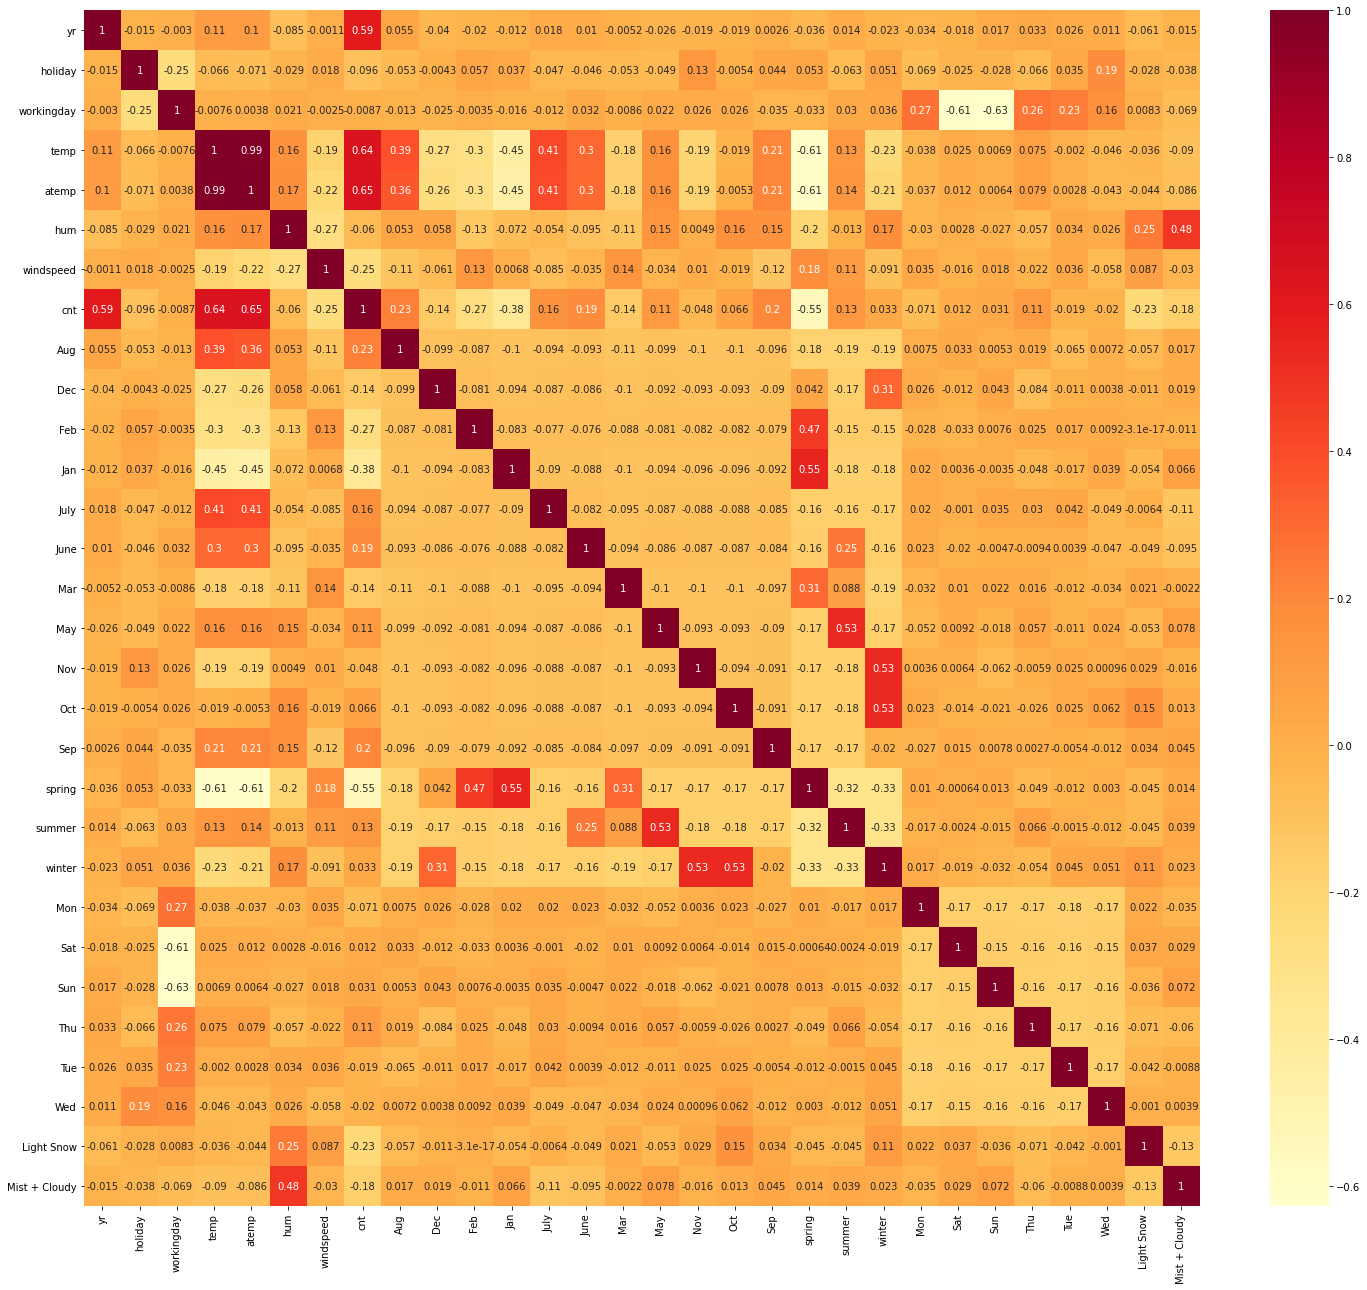

In [30]:
# heatmap
plt.figure(figsize=(25,22))
sns.heatmap(df_train.corr(),annot=True,cmap='YlOrRd')
plt.show()

From the heatmap we can see temp, year are correlated to the 'count' variable. Even in August, September months we can see the counts are little high.

In [31]:
# creating tartget variable ay_test and X_test
y_train=df_train.pop('cnt')
X_train=df_train

# Step 5: Building a linear model
## we will follow mix modelling technique in which first will use sklearn rfe  to com down to 15 the we use stats model.
We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [33]:
# we have imlorted required libraries that is Rfe from sklearn.feature selection and linearregression from linear_model
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,15) 
rfe_data=rfe.fit(X_train,y_train)

In [34]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [35]:
# colummns whith are selected
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'spring', 'summer', 'winter', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [36]:
# columns which are not selected
col1=X_train.columns[~rfe.support_]
col1

Index(['workingday', 'atemp', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [37]:
# Building model using statsmodel, for the detailed statistics
X_train_rfe=X_train[col]

In [38]:
X_train_rfe.shape

(510, 15)

#### Model1

In [39]:

# now we build model using stats library
# add constant
X_train_sm1=sm.add_constant(X_train_rfe)

# create a model
lr=sm.OLS(y_train,X_train_sm1)

# fitting the model
lr_model1=lr.fit()

print(lr_model1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.34e-189
Time:                        21:29:52   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [40]:

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns

# import variance inflation factor from stats model outlier influence
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

vif


,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
10,spring,4.37
12,winter,4.06
11,summer,2.81
14,Mist + Cloudy,2.32
0,yr,2.09
8,Nov,1.83
6,Jan,1.75


In [41]:
# as we can see that hum has high vif so we can drop it
X_train_rfe=X_train_rfe.drop('hum',axis=1)

In [42]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'Dec', 'Jan', 'July', 'Nov',
       'Sep', 'spring', 'summer', 'winter', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

#### model2

In [43]:
# now we build model using stats library
# add constant
X_train_sm2=sm.add_constant(X_train_rfe)

# create a model
lr=sm.OLS(y_train,X_train_sm2)

# fitting the model
lr_model2=lr.fit()

print(lr_model2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.57e-186
Time:                        21:30:14   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2466      0.032      7.679

In [44]:

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns

# import variance inflation factor from stats model outlier influence
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

vif


,Features,VIF
2,temp,5.17
3,windspeed,4.67
11,winter,2.94
9,spring,2.89
10,summer,2.23
0,yr,2.07
7,Nov,1.80
5,Jan,1.66
6,July,1.59
13,Mist + Cloudy,1.56


In [45]:
#temp has vif of above so can drop it
X_train_rfe=X_train_rfe.drop('temp',axis=1)

In [46]:
X_train_rfe.columns

Index(['yr', 'holiday', 'windspeed', 'Dec', 'Jan', 'July', 'Nov', 'Sep',
       'spring', 'summer', 'winter', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

#### model3

In [47]:
# now we build model using stats library
# add constant
X_train_sm3=sm.add_constant(X_train_rfe)

# create a model
lr=sm.OLS(y_train,X_train_sm3)

# fitting the model
lr_model3=lr.fit()

print(lr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.50e-160
Time:                        21:30:33   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5961      0.016     37.557

In [48]:

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns

# import variance inflation factor from stats model outlier influence
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

vif

,Features,VIF
2,windspeed,3.88
8,spring,2.89
10,winter,2.84
9,summer,2.01
0,yr,1.83
6,Nov,1.79
4,Jan,1.64
12,Mist + Cloudy,1.52
3,Dec,1.45
5,July,1.20


In [49]:
# as we can see p value of july  has increase to 0.3 which is high we can drop it
X_train_rfe=X_train_rfe.drop('July',axis=1)

#### model4

In [51]:
# now we build model using stats library
# add constant
X_train_sm4=sm.add_constant(X_train_rfe)

# create a model
lr=sm.OLS(y_train,X_train_sm4)

# fitting the model
lr_model4=lr.fit()

print(lr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.0
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          6.36e-161
Time:                        21:30:53   Log-Likelihood:                 439.28
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     497   BIC:                            -797.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5892      0.014     42.571

In [52]:

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns

# import variance inflation factor from stats model outlier influence
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

vif

,Features,VIF
2,windspeed,3.52
9,winter,2.74
7,spring,2.71
8,summer,1.86
5,Nov,1.79
0,yr,1.77
4,Jan,1.64
11,Mist + Cloudy,1.52
3,Dec,1.45
6,Sep,1.16


In [53]:
#  as we can see that windspeed has high vif so we can drop it
X_train_rfe=X_train_rfe.drop('windspeed',axis=1)

#### model5

In [54]:
# now we build model using stats library
# add constant
X_train_sm5=sm.add_constant(X_train_rfe)

# create a model
lr=sm.OLS(y_train,X_train_sm5)

# fitting the model
lr_model5=lr.fit()

print(lr_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     154.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          8.00e-153
Time:                        21:31:12   Log-Likelihood:                 417.41
No. Observations:                 510   AIC:                            -810.8
Df Residuals:                     498   BIC:                            -760.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5380      0.012     44.785

In [55]:

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns

# import variance inflation factor from stats model outlier influence
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

vif

,Features,VIF
8,winter,2.50
6,spring,1.96
4,Nov,1.78
0,yr,1.64
3,Jan,1.62
10,Mist + Cloudy,1.50
2,Dec,1.45
7,summer,1.34
5,Sep,1.13
9,Light Snow,1.07


In [56]:
#  as we can see that winter p value is 0.2 we can drop it
X_train_rfe=X_train_rfe.drop('winter',axis=1)

#### model6

In [57]:
# now we build model using stats library
# add constant
X_train_sm6=sm.add_constant(X_train_rfe)

# create a model
lr=sm.OLS(y_train,X_train_sm6)

# fitting the model
lr_model6=lr.fit()

print(lr_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     170.1
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.11e-153
Time:                        21:31:27   Log-Likelihood:                 416.78
No. Observations:                 510   AIC:                            -811.6
Df Residuals:                     499   BIC:                            -765.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5320      0.011     49.501

In [58]:

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns

# import variance inflation factor from stats model outlier influence
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

vif

,Features,VIF
6,spring,1.84
3,Jan,1.61
0,yr,1.54
9,Mist + Cloudy,1.43
7,summer,1.30
4,Nov,1.12
5,Sep,1.12
2,Dec,1.10
1,holiday,1.06
8,Light Snow,1.03


- Now we have all the variables with p-value less than 0.05
- All the variables have VIF less than 5 and it's perfect!

# Step 4 residual

In [59]:
# residual analysis=actual y train- y prdictive 
y_train_pred=lr_model6.predict(X_train_sm6)

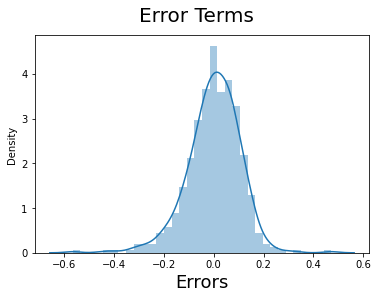

In [60]:
res=y_train-y_train_pred
sns.distplot(res)
plt.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

# STEP4: Prediction and Evaluating the test set

In [61]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [62]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.264840,0.232877,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.442259,0.423633,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             219 non-null    int64  
 1   holiday        219 non-null    int64  
 2   workingday     219 non-null    int64  
 3   temp           219 non-null    float64
 4   atemp          219 non-null    float64
 5   hum            219 non-null    float64
 6   windspeed      219 non-null    float64
 7   Aug            219 non-null    uint8  
 8   Dec            219 non-null    uint8  
 9   Feb            219 non-null    uint8  
 10  Jan            219 non-null    uint8  
 11  July           219 non-null    uint8  
 12  June           219 non-null    uint8  
 13  Mar            219 non-null    uint8  
 14  May            219 non-null    uint8  
 15  Nov            219 non-null    uint8  
 16  Oct            219 non-null    uint8  
 17  Sep            219 non-null    uint8  
 18  spring   

In [64]:
X_train_rfe.columns

Index(['yr', 'holiday', 'Dec', 'Jan', 'Nov', 'Sep', 'spring', 'summer',
       'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [65]:
#Selecting the variables that were part of final model.
col1=X_train_rfe.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_sm6 = sm.add_constant(X_test)

X_test_sm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   Dec            219 non-null    uint8  
 4   Jan            219 non-null    uint8  
 5   Nov            219 non-null    uint8  
 6   Sep            219 non-null    uint8  
 7   spring         219 non-null    uint8  
 8   summer         219 non-null    uint8  
 9   Light Snow     219 non-null    uint8  
 10  Mist + Cloudy  219 non-null    uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 8.6 KB


In [66]:
# Making predictions using the final model (lr6)

y_pred = lr_model6.predict(X_test_sm6)

# MODEL EVALUATION

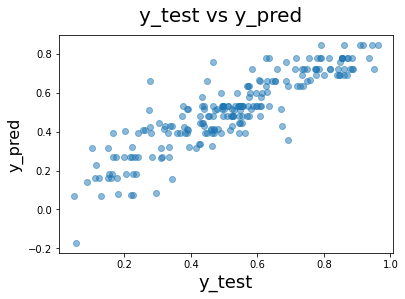

In [67]:
# Plotting y_test and y_pred to understand the spread


fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

# R^2 Value for TEST

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7898491179826095

# Adjusted R^2 Value for TEST

In [69]:
# We already have the value of R^2 (calculated in above step)

r2=0.7898491179826095

In [70]:
# Get the shape of X_test

X_test.shape

(219, 10)

In [71]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7797457101933118

# Final Result Comparison

FINAL RESULT COMPARISON: --- - Train R^2 :0.77 - Train Adjusted R^2 :0.769 --- - Test R^2 :0.789 - Test Adjusted R^2 :0.77 --- - This seems to be a really good model that can very well 'Generalize' various datasets